# Importing Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

# Creating Erdos Renyi Graph and Plotting Degree Centrality

In [2]:
def visualiseER(nodes,p):
    G = nx.erdos_renyi_graph(nodes,p)
    
    d = nx.degree_centrality(G)
    
    fig = plt.figure(figsize = (6,5))
    colors = list(d.values()) 
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, 
            with_labels=True,
            pos = pos,
            node_size = 350,
            node_color = colors,
            edge_color = 'k')
    fig.set_facecolor('white')
    plt.title("Erdos Renyi Graph with nodes = {} and p = {}".format(nodes, p))
    plt.show()
    
    fig = plt.figure(figsize = (8,5))
    w = 0.01
    bins = np.arange(min(list(d.values())), max(list(d.values())) + w, w)
    plt.hist(list(d.values()),bins = bins, density = True, alpha = 0.65, edgecolor = "black")
    plt.title("Degree Centrality Histogram")
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel("Degree Centrality Values")
    plt.ylabel("Frequency")
    plt.show()
    
    return(d)

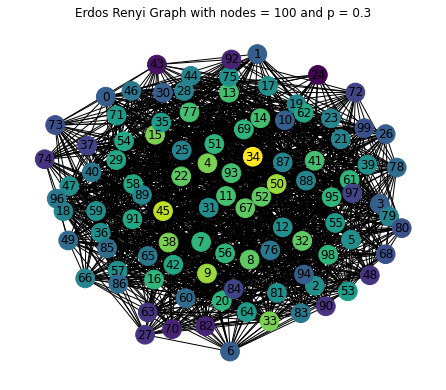

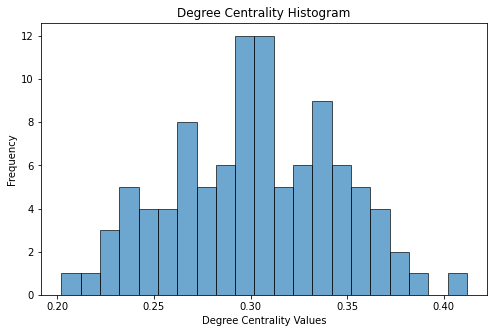

In [3]:
d1 = visualiseER(100, 0.3)

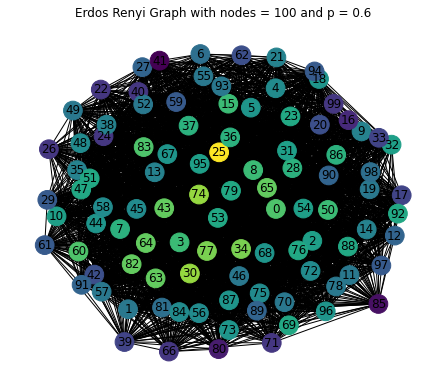

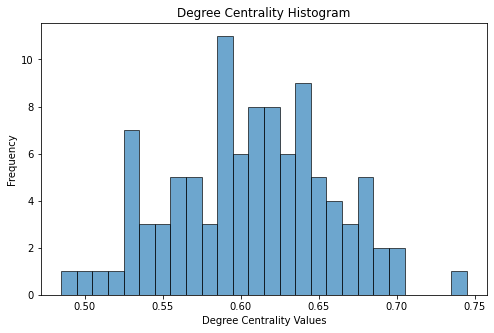

In [4]:
d2 = visualiseER(100,0.6)

## Inferences

1. The more connected nodes can be seen in Yellow Color. As the connectivity decreases, the color moves from **Yellow -> Green -> Blue -> Violet**. 
2. As the probability of connections (p) increases, there will be a higher frequency of those nodes with a higher degree centrality. It means that overall **nodes get more connected**. 
3. Below curve gives a comparison between the two ER Models. It follows a **Binomial Distribution**.

# Comparative ER Models

Text(0, 0.5, 'Frequency')

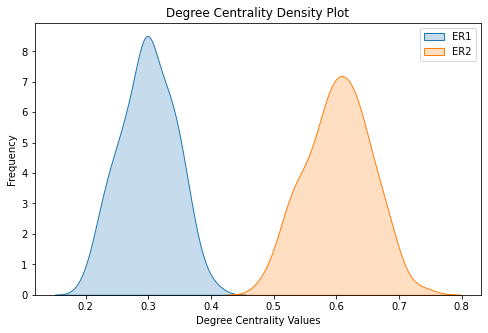

In [5]:
fig = plt.figure(figsize = (8,5))
sns.kdeplot(list(d1.values()), shade = True, label = "ER1")
sns.kdeplot(list(d2.values()), shade = True, label = "ER2")
plt.title("Degree Centrality Density Plot")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.xlabel("Degree Centrality Values")
plt.ylabel("Frequency")

# Creating Barabasi Albert Random Graph and Plotting Degree Centrality

In [6]:
def visualiseBAR(nodes,m):
    G = nx.barabasi_albert_graph(nodes,m)
    
    d = nx.degree_centrality(G)
    
    fig = plt.figure(figsize = (6,5))
    colors = list(d.values()) 
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, 
            with_labels=True,
            pos = pos,
            node_size = 350,
            node_color = colors,
            edge_color = 'k')
    fig.set_facecolor('white')
    plt.title("Barabasi Albert Random Graph with nodes = {} and m = {}".format(nodes, m))
    plt.show()
    
    fig = plt.figure(figsize = (8,5)) 
    w = 0.01
    bins = np.arange(min(list(d.values())), max(list(d.values())) + w, w)
    plt.hist(list(d.values()), bins = bins, density = True, alpha = 0.65, edgecolor = "black")
    plt.title("Degree Centrality Histogram")
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel("Degree Centrality Values")
    plt.ylabel("Frequency")
    plt.show()

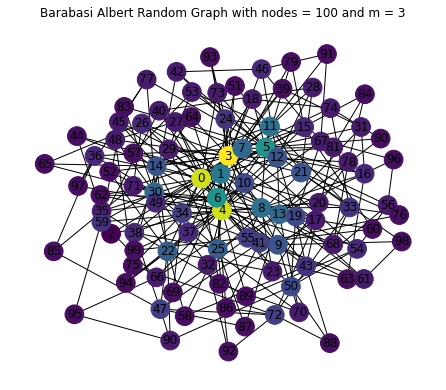

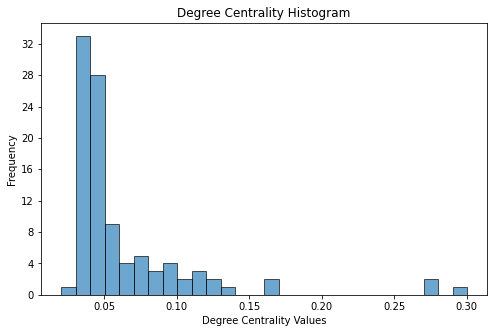

In [7]:
visualiseBAR(100,3)

## Inferences

1. The Node that is most connected will be in Yellow. As the connectivity decreases it moves from **Yellow -> Green -> Blue -> Violet**.
2. The Histogram shows that most nodes are having lower degree centrality. They are less connected to their neighbours.
3. Barabasi Albert Model follows a **Power Law distribution.**

## Conclusion

1. **Degree Centrality**:\
It is a measure of node connectivity in a Graph. It is simply a measure of the number of edges it has w.r.t to the rest of nodes in a network. Here, in directed networks, nodes are having both In-degree and Out-degree, and both are used to calculate it.

2. **Erdos Renyi Model**:\
a. The edges are set in this Graph such that each edge has a fixed probability of being present or absent, independently of the other edges.\
b. They follow a binomial distribution. As p increases, the curve shifts as connectivity increases.\
c. Most real world networks are not ER Random Graphs. They are scale free or BA Graphs. 

3. **Barabasi Albert Model:** \
They have two main characteristics:\
 a. **Growth** : They start with an initial number of nodes. They keep adding the nodes to an initial small network.\
 b. **Preferential Attachment:** Follows **Rich gets Richer** Phenomenon. In this model, an edge is most likely to attach to nodes with higher
degrees.\
\
This is the reason why for Barabasi we see a higher frequency of nodes with lesser degree centrality. These could be the initial set of nodes that are initially less connected and have lower chance of getting the new nodes, to be connected to them. There are a few nodes that will have a higher degree centrality and that becomes the **hubs** in these types of Networks.This follows a **Scale free or Power law distribution**.<br/> 
*Examples for further analysis : Social Networks, Citation Networks, World Wide Web Network (WWW)* 